# More Matplotlib

The objective here is to closely replicate the figures you see. Aim for a high degree of similarity in your visualizations to ensure a thorough understanding and effective application of the concepts covered.

Disclaimer: Kindly be aware that the questions and datasets featured in this tutorial were originally presented by [Ryan Abernathy in "An Introduction to Earth and Environmental Data Science"](https://earth-env-data-science.github.io/intro.html).

**Note**: The following code blocks incorporate packages and functions that have not been formally introduced. In subsequent tutorials, you will become familiar with these packages. For now, the objective is to apply the knowledge gained from the previous tutorial to recreate the displayed graphs.


In [1]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [2]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


In [3]:
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN


### Line plots

In this problem, we will plot some daily weather data from a NOAA station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). A full description of this dataset is available at: <https://www.ncdc.noaa.gov/data-access/land-based-station-data>

The cell below uses pandas to download the data and populate a bunch of numpy arrays (`t_daily_min`, `t_daily_max`, etc.) 
![figure](https://earth-env-data-science.github.io/_images/fig1.png)

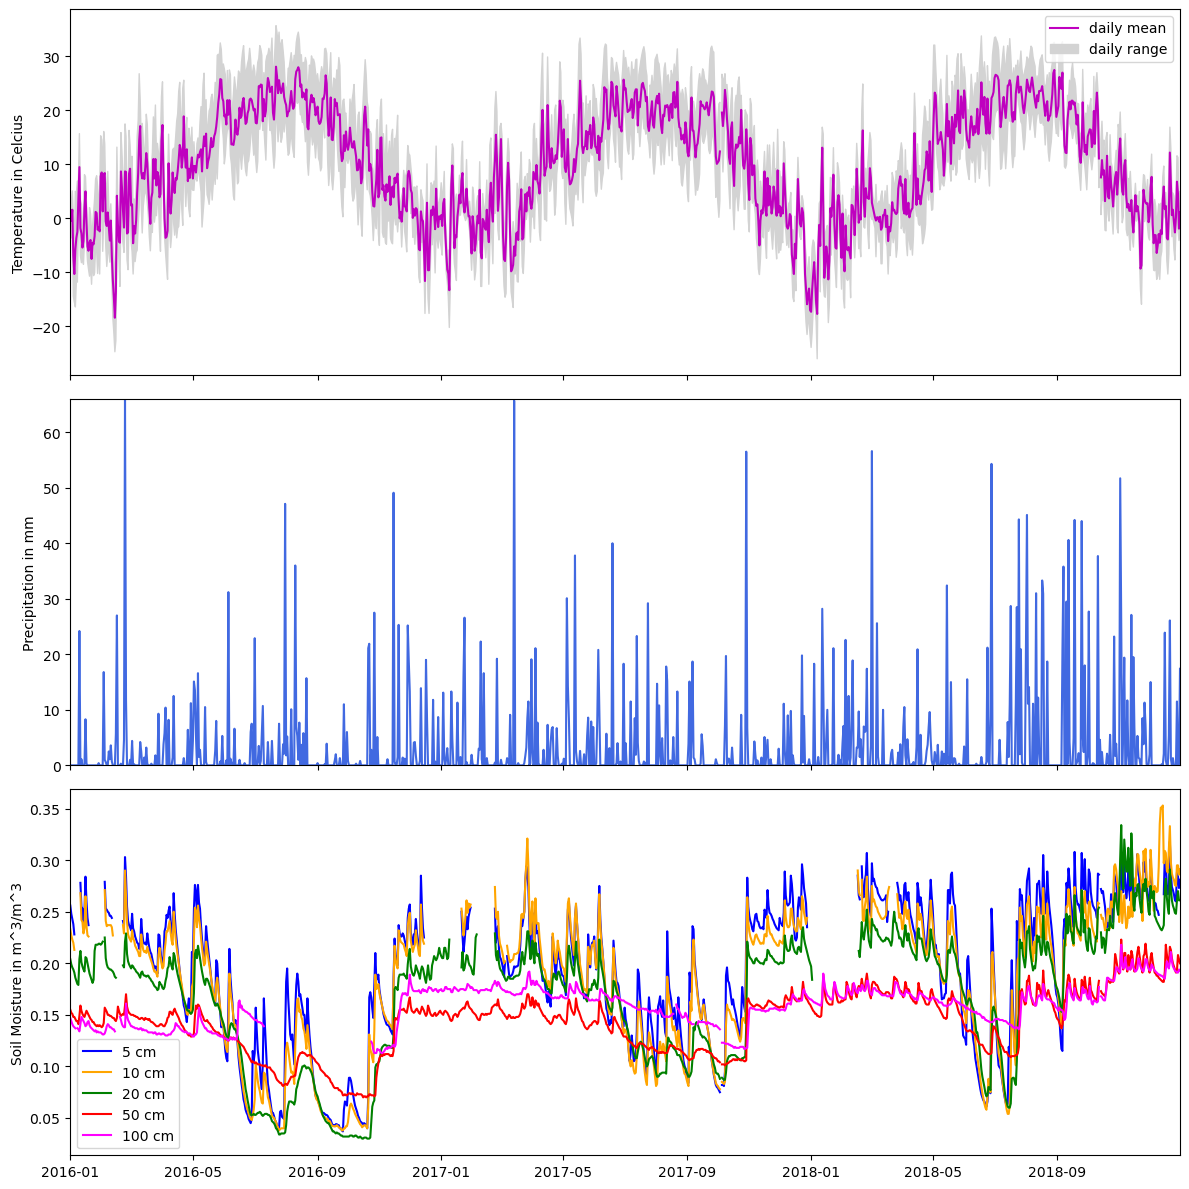

In [4]:
import matplotlib.pyplot as plt

#make figure and subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12,12), sharex=True)

#name subplots
ax0,ax1,ax2 = axes

#subplot 1

#plot the mean
ax0.plot(df.index, df.T_DAILY_MEAN, color = 'm')
#fill the max and min with upper bound = max and lower = min
ax0.fill_between(df.index, df.T_DAILY_MAX, df.T_DAILY_MIN, color='lightgray')
#set axis limit to first and last date
ax0.set_xlim(df.index[0], df.index[-1])

# Add labels
ax0.set_ylabel('Temperature in Celcius')
ax0.legend(['daily mean','daily range'])


#subplot 2

#plot the precipitation
ax1.plot(df.index, df.P_DAILY_CALC, color='royalblue' )
ax1.set_ylim(df.P_DAILY_CALC.min(), df.P_DAILY_CALC.max())

# Add labels
ax1.set_ylabel('Precipitation in mm')



#subplot 3

#plots for each soil variables
ax2.plot(df.index, df.SOIL_MOISTURE_5_DAILY, color='blue')
ax2.plot(df.index, df.SOIL_MOISTURE_10_DAILY, color='orange')
ax2.plot(df.index, df.SOIL_MOISTURE_20_DAILY, color='green')
ax2.plot(df.index, df.SOIL_MOISTURE_50_DAILY, color='red')
ax2.plot(df.index, df.SOIL_MOISTURE_100_DAILY, color='magenta')

# Add labels
ax2.set_ylabel('Soil Moisture in m^3/m^3')
ax2.legend(['5 cm','10 cm','20 cm','50 cm','100 cm'])


plt.tight_layout()
plt.show()

#### Code Explanation

This code block demonstrates a practical application of `Matplotlib` and highlights its versatility. 

**Step 1 - Build The Figure**
```
   #make figure and subplots
   fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12,12), sharex=True)

   #name subplots
   ax0,ax1,ax2 = axes
```

This code initialised the main figure area, `fig`, and generates subplot objects stored within `axes`. The subplot is configured in $3 \times 1$ arrangement, indicating the `axes` variable will contain three subplot objects which are then unpacked and named `ax0`,`ax1` and `ax2`. Here you are introduced to a new argument within the `subplots()` function - `sharex=True` which ensures all three plots will the same $x-axis$. 

**Step 2 - Making The Plots**

   ```
   #subplot 1

    #plot the mean
    ax0.plot(df.index, df.T_DAILY_MEAN, color = 'm')

    #fill the max and min with upper bound = max and lower = min
    ax0.fill_between(df.index, df.T_DAILY_MAX, df.T_DAILY_MIN, color='lightgray')

    #set axis limit to first and last date
    ax0.set_xlim(df.index[0], df.index[-1])
    
    # Add labels
    ax0.set_ylabel('Temperature in Celcius')
    ax0.legend(['daily mean','daily range'])
   ```
1. A line plot representing the daily mean temperature (`df.T_DAILY_MEAN`) against the dates (`df.index`), displayed in magenta.
2. Utilization of fill_between() to shade the area between the daily maximum and minimum temperatures (`df.T_DAILY_MAX` and `df.T_DAILY_MIN`, respectively) using a light gray color.
3. Setting the x-axis limit from the first to the last date in the dataset to ensure the plot range corresponds to the data range.
4. Addition of labels for the y-axis and a legend denoting the plotted components.

<br>
After completing the initial plot, generating the subsequent plots is straightforward, as they follow a similar process and reuse certain functions. It's crucial to carefully observe how specific variables are selected within the `Pandas` library for accurate representation in the plots. Take a look at the code for the other plots before proceeding.

<br>
<br>
<br>

### Contour Plots

Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis. Note the plots are different sizes.
![fig2](https://earth-env-data-science.github.io/_images/fig2.png)

In [5]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

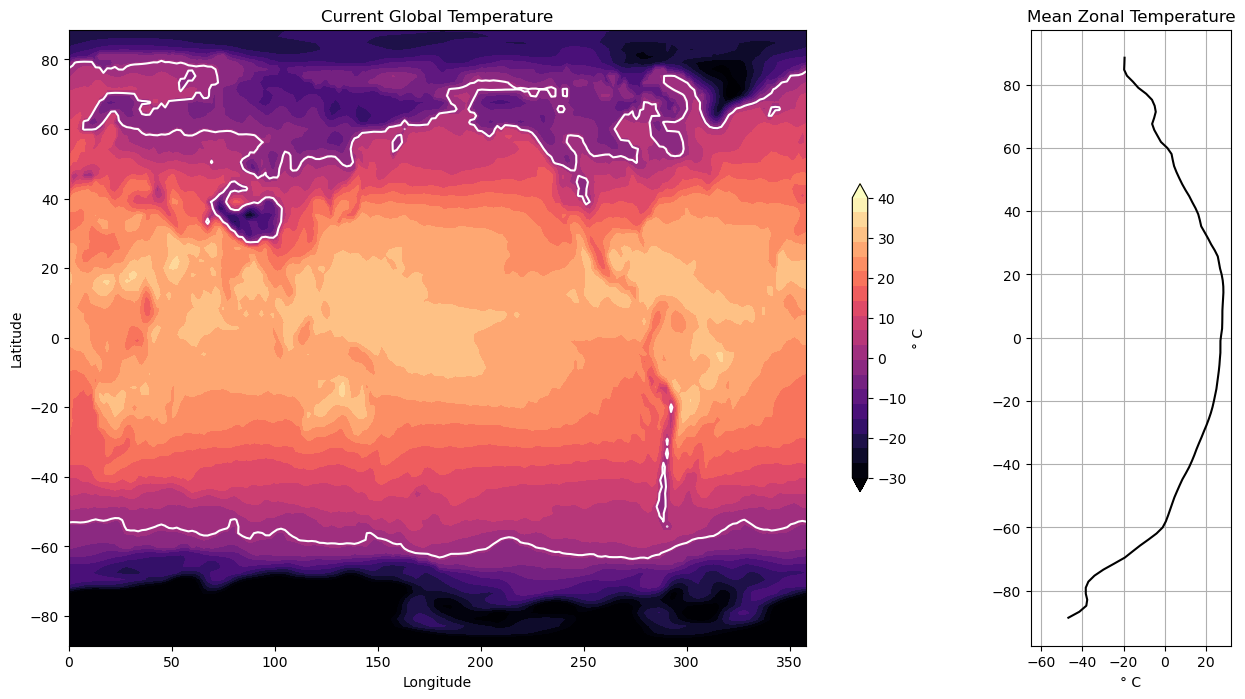

In [6]:
import numpy as np

#make figure and subplots
fig = plt.figure(figsize=(15,8))

#make subplots with diff figure sizes
ax0 = plt.subplot2grid(shape=(1, 5), loc=(0, 0), rowspan=1, colspan=4) #first row and first col spanning 2 cols and 2 rows
ax1 = plt.subplot2grid(shape=(1, 5), loc=(0,4), rowspan=1, colspan=1) #first row, 3rd col spaning 2 rowa and one column


#subplot 1
# Create a shaded contour plot
contour = ax0.contourf(lon, lat, temp, levels=np.linspace(-30, 40, 20), extend='both', cmap='magma')

# Add a white contour for temperature values of 0 degrees
ax0.contour(lon, lat, temp, levels=[0], colors='white') 

# Add a colorbar
cbar = plt.colorbar(contour, shrink=0.5)
cbar.set_ticks(np.arange(-30,41,10)) #set the ticks for temp scale
cbar.set_label('\u00b0 C')

# Add labels and a title
ax0.set_xlabel('Longitude')
ax0.set_ylabel('Latitude')
ax0.set_title('Current Global Temperature')


#subplot 2

#lat requires a column-wise operation
zonal_mean_temp = np.nanmean(temp, axis=1) #mean temp for each lat

ax1.plot(zonal_mean_temp, lat, color='black')
ax1.set_yticks(np.arange(-80, 81, 20)) #from - 80 to 80 with 20 steps between
ax1.set_xticks(np.arange(-60, 21, 20)) #from -60 to 20 with 20 steps between

ax1.set_xlim(-65) #setting lower limit of x_axis

#add labels
ax1.set_xlabel("\u00b0 C")
ax1.set_title('Mean Zonal Temperature')

#set up grid
ax1.grid(which='major')

# Display the plot
#plt.tight_layout
plt.show()


#### Code Explanation

Having seen the steps taken previously, this code block should be somewhat clear but there are a few new functions introduced. 

1. `plt.subplot2grid()` This function creates a subplot with a grid layout, allowing precise specification of the plot's placement within the figure.
   1. `shape` - Specifies the grid's size for subplots. In this case, a $1 \times 5$ grid is defined.
   2. `loc` - Specifies the location for a specific plot within the grid using typical indexing. For instance, the first plot is positioned in the first row and first column at coordinates $(0, 0)$.
   3. `rowspan` - Indicates the number of rows the plot should occupy.
   4. `colspan` - Specifies the number of columns the plot should span. In the given scenario, the first plot extends across 4 of the 5 columns within the grid.

<br>

2. `contourf()` - Creates a filled contour plot using 3 basic arguments
   1. `lon` - provides the scale for the $x-axis$
   2. `lat` - provides the scale for the $y-axis$
   3. `temp` - provides the data for the creation of the contours.

      
   With these 3 arguments a basic filled contour can be created but we want to add customization.
   
   5. `levels` - takes an array-like object and draws the contours. Here, a contour is drawn to separate temperature below and above zero.
   6. `color` - is specified to change the colour of this contour line, the default colour is black.
  

An interesting comparison can be made between the use of `plt.colorbar()` here and its initial use in the previous tutorial. While achieving similar results, there are slight differences in the argument setup. Further showing the versatility of the `Mathplotlib` package.

<br>
<br>
<br>

### Scatterplots
A map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by $log10(depth)$ and adjust the marker size to be $magntiude^4$ $/100$

![fig3](https://earth-env-data-science.github.io/_images/fig3.png)


The code block directly below is solely for the purpose of fetching the and variables

In [7]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

/tmp/ipykernel_1055745/2629247015.py:8: RuntimeWarning: divide by zero encountered in log10
  log_depth = np.log10(depth)


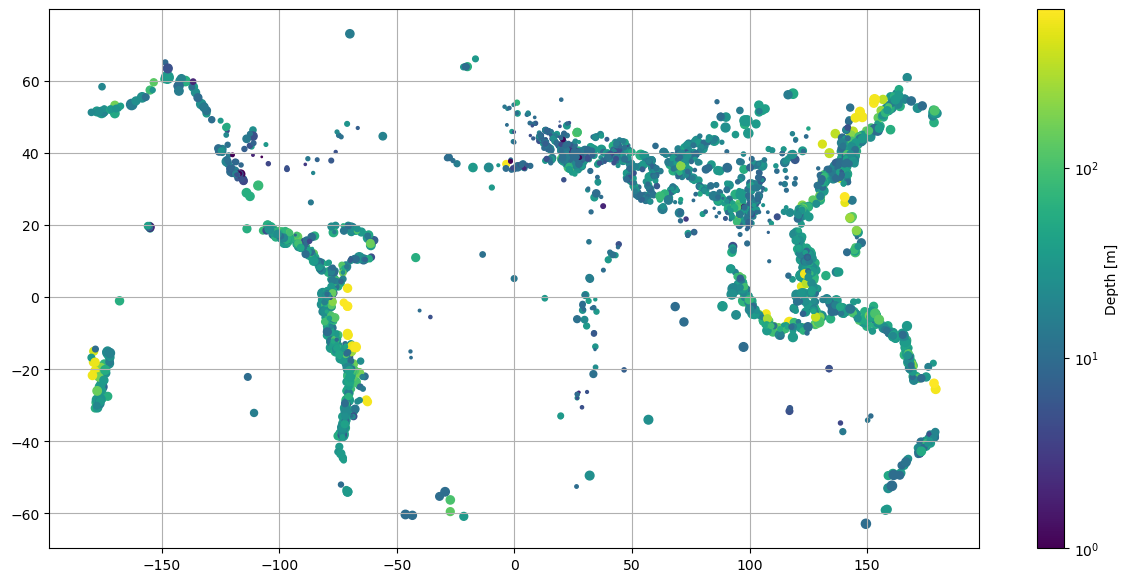

In [8]:
#set figure size
plt.figure(figsize=(15,7))

#set size for magnitudes of earthquakes
size = (magnitude**4)/100

#create array of log10 of depth
log_depth = np.log10(depth)

#make scatter plot
scatter = plt.scatter(longitude,latitude, s=size, c=log_depth)

#create colorbar
cbar = plt.colorbar(scatter, format="10$^%d$") #format colorbar for 10^x)
cbar.set_ticks([0,1,2]) #set ticks to be whoell numbers

# Set colorbar label
cbar.set_label('Depth [m]') 

#make gride of major values
plt.grid(which='major')
plt.show()

This plot serves as a great example of the functionality of the arguments previously introduced for `scatter()`. Note how the sizes and colours of individual earthquakes have been made to vary. Take a moment to review the code.

<br>
<br>

### Final Thoughts

This chapter provided a more in-depth exploration of the capabilities offered by `Matplotlib`. By now, you should have gained a better understanding of how to customize plots, make visually appealing and interpretable visualizations. If certain aspects were confusing, consider revisiting the content. Remember, practice is key to mastery. Let's continue learning!